In [3]:
import pandas as pd
import numpy as np
import os


In [8]:
file_path = 'C:/Users/nazar/OneDrive/Documentos/EDA/adult/adult.data'
df = pd.read_csv(file_path, header=None)


# Mostrar primeras filas
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
df.columns = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]
df.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
df.describe(include='all')


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [12]:
# Cuántos "?" hay por columna (formato del dataset original)
(df == ' ?').sum()


age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [13]:
df.replace(' ?', np.nan, inplace=True)


In [14]:
df.isnull().sum()


age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [15]:
df.dropna(inplace=True)


In [16]:
df.isnull().sum()


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [17]:
df.shape


(30162, 15)

In [18]:
# Eliminar espacios a la izquierda/derecha de los valores tipo string
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()


In [19]:
df['workclass'].unique()


array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [20]:
#todas las categorías a minúsculas
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower()


In [21]:
#chequeo final 
for col in df.select_dtypes(include='object').columns:
    print(f"\n🟩 {col} — {df[col].nunique()} unique values:")
    print(sorted(df[col].unique()))



🟩 workclass — 7 unique values:
['federal-gov', 'local-gov', 'private', 'self-emp-inc', 'self-emp-not-inc', 'state-gov', 'without-pay']

🟩 education — 16 unique values:
['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'assoc-acdm', 'assoc-voc', 'bachelors', 'doctorate', 'hs-grad', 'masters', 'preschool', 'prof-school', 'some-college']

🟩 marital_status — 7 unique values:
['divorced', 'married-af-spouse', 'married-civ-spouse', 'married-spouse-absent', 'never-married', 'separated', 'widowed']

🟩 occupation — 14 unique values:
['adm-clerical', 'armed-forces', 'craft-repair', 'exec-managerial', 'farming-fishing', 'handlers-cleaners', 'machine-op-inspct', 'other-service', 'priv-house-serv', 'prof-specialty', 'protective-serv', 'sales', 'tech-support', 'transport-moving']

🟩 relationship — 6 unique values:
['husband', 'not-in-family', 'other-relative', 'own-child', 'unmarried', 'wife']

🟩 race — 5 unique values:
['amer-indian-eskimo', 'asian-pac-islander', 'black', 'other', '

In [ ]:
#detección de outliers
numeric_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

df[numeric_cols].describe()


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
#se ha reiniciado el kernel 
import pandas as pd
import numpy as np

# Ruta al archivo
df = pd.read_csv('C:/Users/nazar/OneDrive/Documentos/EDA/adult/adult.data', header=None)

# Nombres de columnas
df.columns = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]

# Reemplazo de '?'
df.replace(' ?', np.nan, inplace=True)

# Eliminar nulos
df.dropna(inplace=True)

# Strip + lower
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()


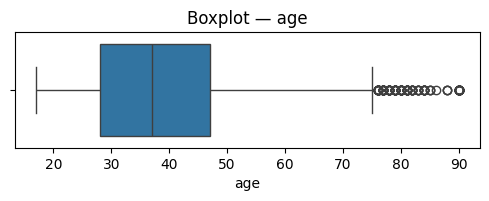

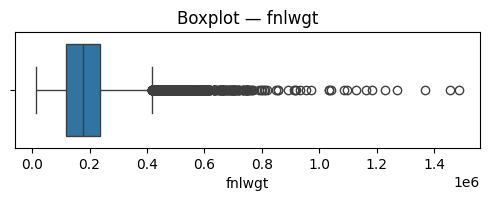

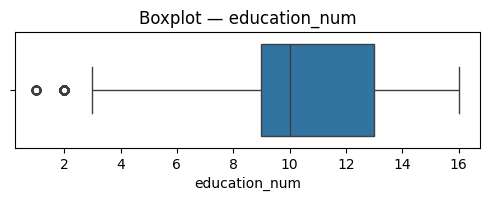

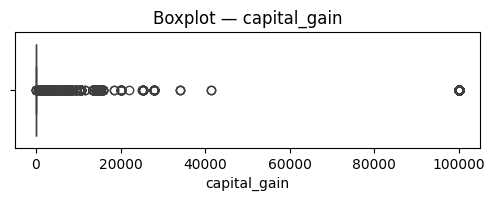

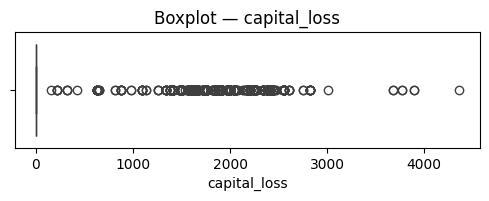

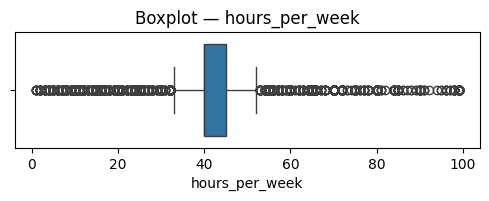

In [8]:
#ahora si los gráficos
numeric_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

for col in numeric_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot — {col}')
    plt.show()


In [9]:
#Filtrar outliers opcionales
# Filtrar registros con hours_per_week > 80 (opcional)
df = df[df['hours_per_week'] <= 80]

# También podrías filtrar capital_gain muy altos, si querés
df = df[df['capital_gain'] <= 50000]


In [11]:
#guardar el dataset limpio
df.to_csv('C:/Users/nazar/OneDrive/Documentos/EDA/data/clean/adult_clean.csv', index=False)


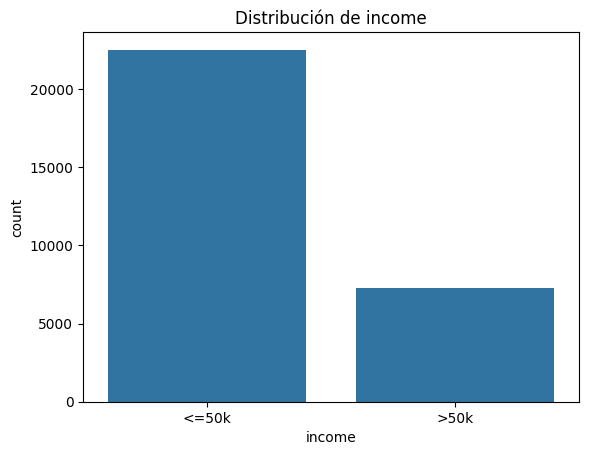

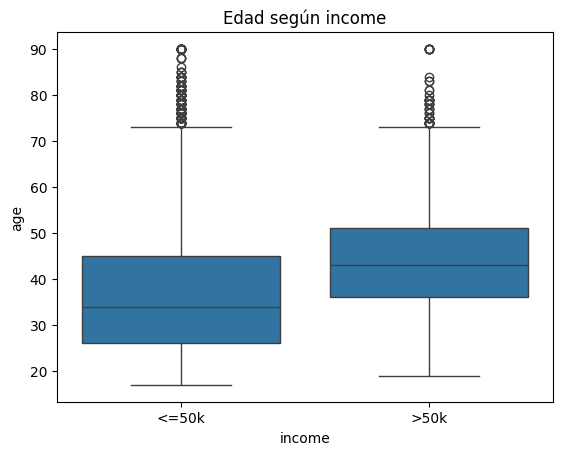

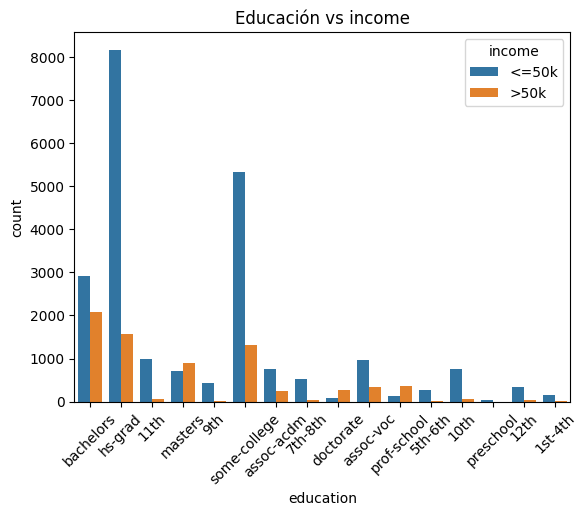

In [12]:
#Visualizaciones básicas para cerrar el EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de la variable objetivo
sns.countplot(x='income', data=df)
plt.title('Distribución de income')
plt.show()

# Distribución de edad según income
sns.boxplot(x='income', y='age', data=df)
plt.title('Edad según income')
plt.show()

# Relación educación vs income
sns.countplot(x='education', hue='income', data=df)
plt.xticks(rotation=45)
plt.title('Educación vs income')
plt.show()
